## Data Import and Wrangling

**Links to datasets:**

- [Orange vs. Grapefruit](https://www.kaggle.com/datasets/joshmcadams/oranges-vs-grapefruit/)
- [Online Chess Games](https://www.kaggle.com/datasets/ulrikthygepedersen/online-chess-games/data)
- [Classical vs. Pop Music](https://www.kaggle.com/datasets/insiyeah/musicfeatures/data)
- [Agaricus Lepiota Mushrooms](https://archive.ics.uci.edu/dataset/73/mushroom)


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.simplefilter(action='ignore')

# Importing data
fruits = pd.read_csv('data/fruits/citrus.csv')

chess = pd.read_csv('data/chess/chess_games.csv')

music = pd.read_csv('data/music/pop_classical.csv')

lep_columns = ['poisonous', 'cap_shape', 'cap_surface', 'cap_color', 'bruises', 
           'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
           'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring',
           'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color',
           'ring_number', 'ring_type', 'spore_print_color', 'population', 'habitat']
lepiota = pd.read_csv('data/mushroom/agaricus-lepiota.data', names = lep_columns)

## Cleaning and Preparing `fruits`

In [2]:
fruits.head()

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2
3,orange,4.47,95.60,163,81,4
4,orange,4.48,95.76,161,72,9


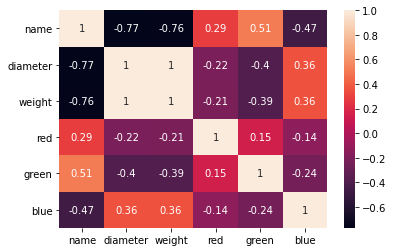

In [3]:
# Converting targets to boolean
# 1 - orange, -1 - grapefruit
def fruit_bool(val):
    if val == 'orange':
        return 1
    else:
        return -1

fruits = fruits.assign(name = fruits['name'].apply(fruit_bool))

# Checking correlations between features
sns.heatmap(fruits.corr(), annot = True);

Since `diameter` and `weight` are extremely correlated, there is no need for both of them to be considered as features. `weight` will be dropped as it has the larger values, making modelling less computationally expensive.

In [4]:
# Dropping weight column
fruits.drop(['weight'], axis = 1, inplace = True)
# Convert data into feature (X) and label (Y) arrays
fruit_X = fruits.drop(['name'], axis = 1).to_numpy()
fruit_Y = fruits['name'].to_numpy()

print(fruit_X.shape) # 10000 x 4
print(fruit_Y.shape) # 10000 x 1

(10000, 4)
(10000,)


## Cleaning and Preparing `chess`

In [5]:
chess.head()

,game_id,rated,turns,victory_status,winner,time_increment,white_id,white_rating,black_id,black_rating,moves,opening_code,opening_moves,opening_fullname,opening_shortname,opening_response,opening_variation
0,1,False,13,Out of Time,White,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,5,Slav Defense: Exchange Variation,Slav Defense,NaN,Exchange Variation
1,2,True,16,Resign,Black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,4,Nimzowitsch Defense: Kennedy Variation,Nimzowitsch Defense,NaN,Kennedy Variation
2,3,True,61,Mate,White,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,3,King's Pawn Game: Leonardis Variation,King's Pawn Game,NaN,Leonardis Variation
3,4,True,61,Mate,White,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,3,Queen's Pawn Game: Zukertort Variation,Queen's Pawn Game,NaN,Zukertort Variation
4,5,True,95,Mate,White,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,5,Philidor Defense,Philidor Defense,NaN,NaN


In [6]:
# Removing unnecessary variables
chess_cleaned = chess.drop(['game_id', 'time_increment', 'white_id', 'black_id', 'moves', 'opening_moves', 'opening_fullname',
            'opening_shortname', 'opening_response', 'opening_variation'], axis = 1)

# Converting values to booleans
# rated: 1 - yes, 0 - no
# winner: 1 - white, -1 - black
def chess_bool(val):
    if not val:
        return 0
    elif val == 'Black':
        return -1
    else:
        return 1

chess_cleaned = chess_cleaned.assign(rated = chess_cleaned['rated'].apply(chess_bool))
chess_cleaned = chess_cleaned.assign(winner = chess_cleaned['winner'].apply(chess_bool))

In [7]:
# One-hot encoding all categorical features
ohe = OneHotEncoder(sparse = False)
chess_X = ohe.fit_transform(chess_cleaned.get(['victory_status', 'opening_code']))

In [8]:
# Convert data into feature (X) and label (Y) arrays
num_features = num_features = chess_cleaned.get(['rated', 'turns', 'white_rating', 'black_rating']).to_numpy()

# Combining numerical features array and one-hot encoded features
chess_X = np.hstack((num_features, chess_X))
chess_Y = chess_cleaned['winner'].to_numpy()

print(chess_X.shape) # 20058 x 373
print(chess_Y.shape) # 20058 x 1

(20058, 373)
(20058,)


## Cleaning and Preparing `music`

In [9]:
music.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,pop.00024.au,117.453835,57,0.410990,0.207584,3301.781785,3175.656592,7302.597509,0.144527,-40.802069,...,-0.568772,0.552448,-1.981371,1.915755,0.076505,-1.270496,1.233082,1.493700,0.949931,1
1,pop.00099.au,78.302557,38,0.360462,0.138195,2765.747194,3222.713605,6873.391771,0.096015,-119.320605,...,1.566938,-2.932391,-1.609138,-0.200545,-2.429376,1.207988,5.848729,1.609469,7.580263,1
2,pop.00009.au,107.666016,50,0.454810,0.159711,3279.877315,3026.391118,6953.099622,0.172819,-35.277026,...,-0.518891,0.212918,-1.294660,-0.105626,-1.245879,-2.528455,0.571032,1.569434,-1.724873,1
3,pop.00078.au,103.359375,52,0.454698,0.223419,3124.176350,2970.320532,6618.134981,0.142721,-42.757179,...,3.020176,-1.242321,-3.524069,-0.325165,-1.443294,-1.864617,-0.031307,-0.729631,-0.987611,1
4,pop.00037.au,103.359375,51,0.451668,0.240985,3236.413205,2953.596262,6698.776160,0.164825,4.821123,...,1.753352,3.336132,2.352307,1.428845,-0.604926,-2.185691,-1.602394,-0.612146,-4.050126,1


In [10]:
# Dropping filename column
music_cleaned = music.drop(['filename'] , axis = 1)

# Setting labels to booleans
# Classical - 1, Pop - 0
def label_bool(val):
    if val == 2:
        return 1
    else:
        return -1
    
music_cleaned = music_cleaned.assign(label = music_cleaned['label'].apply(label_bool))

In [11]:
# Since there are no categorical variables, no one-hot encoding is required
# Convert data into feature (X) and label (Y) arrays

music_X = music_cleaned.drop(['label'], axis = 1).to_numpy()
music_Y = music_cleaned['label'].to_numpy()

print(music_X.shape) # 200 x 28
print(music_Y.shape) # 200 x 1

(200, 28)
(200,)


## Cleaning and Preparing `lepiota`

In [12]:
lepiota.head()

,poisonous,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


To simplify feature space, the following adjustments will be made to the data:
- Drop `stalk_root` since it has N/A values
- Combine values in `habitat` such that (g/m), (u/w), and (l/p/d) are the three groups
- Combine values in `population` such that (a/n/v) is treated as one group
- Convert values in `ring_number` to integers
- Set `bruises` to a boolean

In addition to `poisonous` (label), the following features will be used in the model:
- `cap_shape`
- `cap_surface`
- `cap_color`
- `bruises`
- `odor`
- `gill_size`
- `stalk_shape`
- `veil_type`
- `population`
- `habitat`

In [13]:
# Dropping certain features to simplify data set and remove any missing values
lepiota.drop(['gill_attachment', 'gill_spacing', 'gill_color', 'stalk_root', 
              'stalk_surface_above_ring', 'stalk_surface_below_ring', 
              'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_color',
              'ring_type', 'spore_print_color'], axis = 1, inplace = True)

# Defining transformation functions
def ring_num(val):
    if val == 'n':
        return 0
    elif val == 'o':
        return 1
    else:
        return 2
    
def to_bool(val):
    if val == 't' or val == 'p':
        return 1
    elif val == 'f':
        return 0
    else:
        return -1

def pop_trans(val):
    if val in['a', 'n', 'v']:
        return 'm' 
    else:
        return val

def habitat_trans(val):
    if val == 'g':
        return 'm'
    elif val == 'w':
        return 'u'
    elif val in ['l', 'p']:
        return 'd'
    else:
        return val
    
# Applying transformations
lepiota = lepiota.assign(ring_number = lepiota.get('ring_number').apply(ring_num))
lepiota = lepiota.assign(bruises = lepiota.get('bruises').apply(to_bool))
lepiota = lepiota.assign(poisonous = lepiota.get('poisonous').apply(to_bool))
lepiota = lepiota.assign(population = lepiota.get('population').apply(pop_trans))
lepiota = lepiota.assign(habitat = lepiota.get('habitat').apply(habitat_trans))

In [14]:
# Convert data into feature (X) and label (Y) arrays
lep_X = lepiota.drop(['poisonous'], axis = 1) # Features
lep_Y = lepiota.get('poisonous').to_numpy() # Labels

# One-hot encoding selected feature values
lep_X = ohe.fit_transform(lep_X) 

print(lep_X.shape) # 8124 x 46
print(lep_Y.shape) # 8124 x 1

(8124, 46)
(8124,)
